In [2]:
import Starfish
from Starfish.grid_tools import HDF5Interface
myHDF5 = HDF5Interface()
flux = myHDF5.load_flux(np.array([3000, 3.0, 0.0]))


In [3]:
flux

array([ 45507.8515625 ,  55029.80078125,  63584.19140625, ...,
        27547.4140625 ,  35989.15625   ,  45470.04296875], dtype=float32)

In [4]:
wl =myHDF5.wl

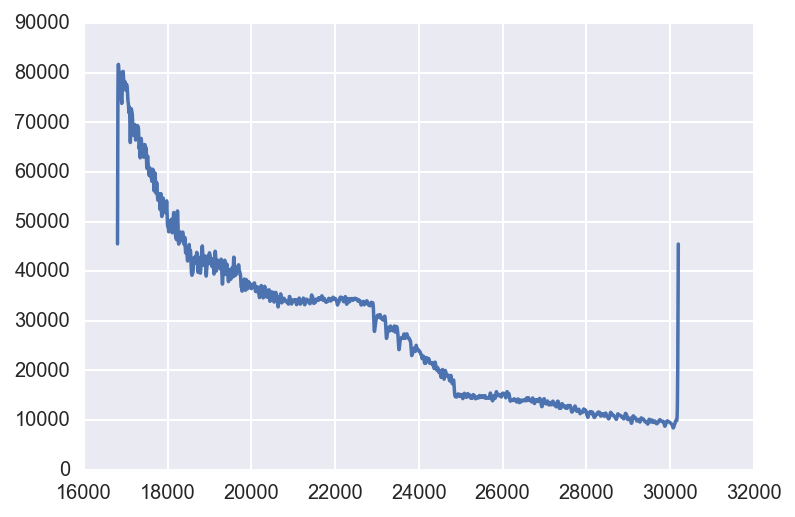

In [5]:
plt.plot(wl, flux)

In [6]:
wl.shape

(4096,)

What is the native sampling?

In [17]:
sampling = wl[1:]-wl[0:-1]

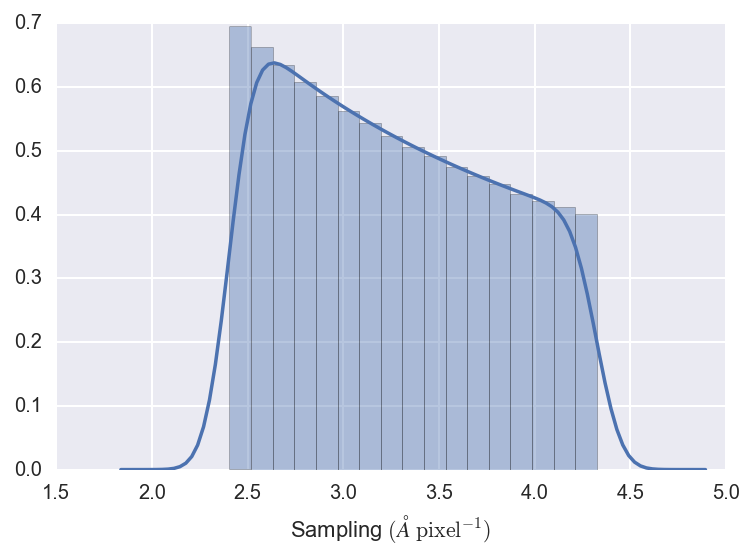

In [18]:
sns.distplot(sampling)
plt.xlabel('Sampling $(\AA \; \mathrm{pixel}^{-1})$')

What about the resolution?  
$R(\lambda) = \lambda/\Delta \lambda$  
$\Delta \lambda = \lambda/R$  
R ~ 1000


In [19]:
delta_lambda = wl/1000.0

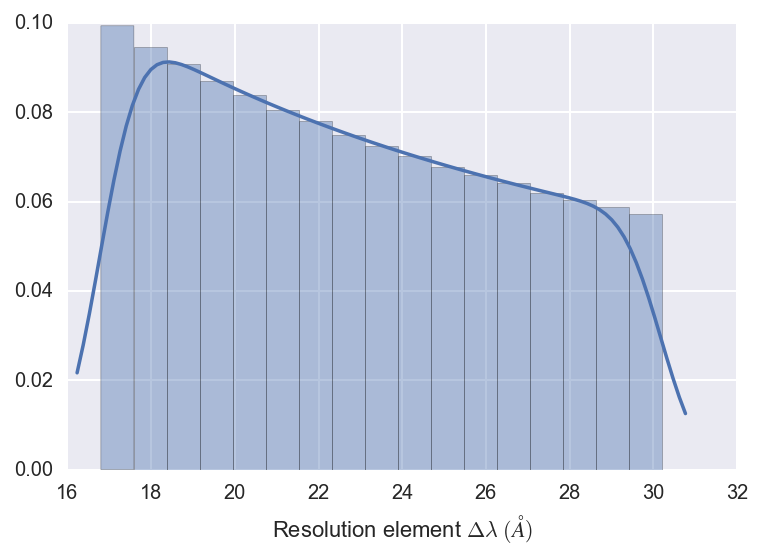

In [23]:
sns.distplot(delta_lambda)
plt.xlabel('Resolution element $\Delta \lambda \;(\AA)$')

For 2.4 pixels/resolution element sampling (made up), we would need:  
10 Angstroms/pixel.

In [25]:
wl_out = np.arange(17000, 30000, 10)

We just want to make fake data for the sampling.  We will generate the simulated flux later.

In [26]:
import h5py

In [27]:
#!mkdir /Users/gully/GitHub/protostars/data/synthetic

In [29]:
wl_out

array([17000, 17010, 17020, ..., 29970, 29980, 29990])

In [28]:
dummy_flux = wl_out*0.0+1.0
dummy_sig = wl_out*0.0+0.01
dummy_mask = np.zeros(len(wl_out))

f = h5py.File("/Users/gully/GitHub/protostars/data/synthetic/jwst_235m_sampling.hdf5", "w")
dset1 = f.create_dataset('wls', data=wl_out) #Angstroms
dset2 = f.create_dataset('fls', data=dummy_flux)
dset3 = f.create_dataset('sigmas', data=dummy_sig)
dset4 = f.create_dataset('masks', data=dummy_mask)
f.close()